In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7716 - loss: 0.6515 - val_accuracy: 0.8703 - val_loss: 0.3503
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8805 - loss: 0.3293 - val_accuracy: 0.8860 - val_loss: 0.3088
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8988 - loss: 0.2751 - val_accuracy: 0.9007 - val_loss: 0.2765
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9129 - loss: 0.2412 - val_accuracy: 0.9105 - val_loss: 0.2492
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9198 - loss: 0.2181 - val_accuracy: 0.9000 - val_loss: 0.2868
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9283 - loss: 0.1964 - val_accuracy: 0.9125 - val_loss: 0.2556
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9351 - loss: 0.1764 - val_accuracy: 0.9160 - val_loss: 0.2489
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9399 - loss: 0.

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9049 - loss: 0.2963
Test accuracy: 0.9089


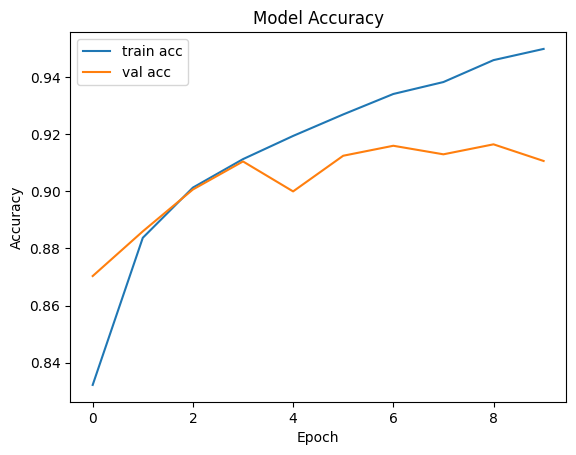

In [12]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Project Report: Fashion MNIST Classification Using CNN

1. Dataset Overview


The Fashion MNIST dataset comprises 70,000 grayscale images of 28x28 pixels, categorized into 10 fashion apparel classes such as T-shirts, trousers, shoes, etc. The data is split into training (60,000) and testing (10,000) samples.

2. Data Preprocessing  

    Normalization: Pixel values were scaled from the range [0, 255] to [0, 1] to improve training stability.
    Reshaping: The images were reshaped to include a single channel dimension, resulting in shape (28, 28, 1), suitable for CNN input.

3. Model Architecture
A Convolutional Neural Network (CNN) was constructed with the following layers:

    Conv2D layer with 32 filters, 3x3 kernel, ReLU activation
    MaxPooling2D with 2x2 pool size
    Conv2D with 64 filters, 3x3 kernel, ReLU activation
    MaxPooling2D with 2x2 pool size
    Flatten layer to convert 2D feature maps to 1D feature vectors
    Dense layer with 64 units and ReLU activation
    Output Dense layer with 10 units and softmax activation for multi-class classification

4. Training Results
The model was trained for 10 epochs with the following key metrics:

    Epoch-wise accuracy and validation accuracy:
        Epoch 1: 77.16% accuracy, 87.03% val accuracy
        Epoch 10: 95.23% accuracy, 91.07% val accuracy
    Training loss decreased steadily across epochs, indicating effective learning.

5. Model Performance  

    Test Accuracy: 90.89%
    Test Loss: 0.2963
    The model demonstrated good generalization to unseen data, with validation accuracy stabilizing around 91%.

6. Conclusion
The CNN effectively learned to classify fashion items with over 90% accuracy. The architecture, combined with proper normalization and reshaping, contributed to robust performance. Future improvements could involve hyperparameter tuning, data augmentation, or advanced CNN architectures to potentially increase accuracy further.